# Topics in Working with Spatial Data

In [1]:
import geopandas
import matplotlib.pyplot as plt
import pandas
from IPython.display import IFrame
%matplotlib inline

In [2]:
neighborhoods = pandas.read_csv('../data/neighborhoods.csv')
listings = pandas.read_csv('../data/listings.csv')

In [3]:
listings.head()

id                        listing_url       scrape_id last_scraped  \
0  1078  https://www.airbnb.com/rooms/1078  20190514155147   2019-05-14   
1  2265  https://www.airbnb.com/rooms/2265  20190514155147   2019-05-14   
2  5245  https://www.airbnb.com/rooms/5245  20190514155147   2019-05-14   
3  5456  https://www.airbnb.com/rooms/5456  20190514155147   2019-05-14   
4  5769  https://www.airbnb.com/rooms/5769  20190514155147   2019-05-14   

                                        name  \
0          *UT/Hyde Park Craftsman Apartment   
1            Zen-East in the Heart of Austin   
2        Green, Colorful, Clean &  Cozy home   
3  Walk to 6th, Rainey St and Convention Ctr   
4                             NW Austin Room   

                                             summary  \
0  This upstairs apartment is surrounded by trees...   
1  Zen East is situated in a vibrant & diverse mu...   
2                                                NaN   
3  Fabulous location for walking to Convention Ce...   
4                                                NaN   

                                               space  \
0  The garage apartment was built in the 1920s an...   
1  This colorful and clean 1923 house was complet...   
2  Situated in a vibrant & diverse multicultural ...   
3  Cute Private Studio apartment located in Willo...   
4  Looking for a comfortable inexpensive room to ...   

                                         description experiences_offered  \
0  This upstairs apartment is surrounded by trees...                none   
1  Zen East is situated in a vibrant & diverse mu...                none   
2  Situated in a vibrant & diverse multicultural ...                none   
3  Fabulous location for walking to Convention Ce...                none   
4  Looking for a comfortable inexpensive room to ...                none   

                               neighborhood_overview  ...  \
0  Hyde Park is close to downtown, UT, 6th street...  ...   
1                                                NaN  ...   
2                                                NaN  ...   
3  My neighborhood is ideally located if you want...  ...   
4  Quiet neighborhood with lots of trees and good...  ...   

  is_business_travel_ready          cancellation_policy  \
0                        f                     flexible   
1                        f  strict_14_with_grace_period   
2                        f  strict_14_with_grace_period   
3                        f  strict_14_with_grace_period   
4                        f                     moderate   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             f                                f   
2                             f                                f   
3                             f                                t   
4                             t                                t   

  calculated_host_listings_count  calculated_host_listings_count_entire_homes  \
0                              2                                            2   
1                              3                                            2   
2                              3                                            2   
3                              1                                            1   
4                              1                                            0   

   calculated_host_listings_count_private_rooms  \
0                                             0   
1                                             1   
2                                             1   
3                                             0   
4                                             1   

  calculated_host_listings_count_shared_rooms  reviews_per_month  \
0                                           0               1.70   
1                                           0               0.19   
2    

In [4]:
list(listings.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_hood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'hood',
 'hood_cleansed',
 'hood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_p

In [5]:
neighborhoods.head()

hood_id  hood_group                                                wkb
0    78739         NaN  01060000000100000001030000000100000077020000AC...
1    78754         NaN  01060000000100000001030000000100000074010000B1...
2    78732         NaN  0106000000010000000103000000010000009601000082...
3    78737         NaN  010600000001000000010300000001000000F1000000A4...
4    78756         NaN  010600000001000000010300000001000000DE0000007E...

In [6]:
neighborhoods.columns

Index(['hood_id', 'hood_group', 'wkb'], dtype='object')

# Creating geometries from raw coordinates

In [7]:
listings = geopandas.GeoDataFrame(listings, geometry=geopandas.points_from_xy(listings.longitude, 
                                                                              listings.latitude))

In [8]:
from shapely import wkb

In [9]:
neighborhoods['geometry'] = neighborhoods.wkb.apply(lambda shape: wkb.loads(shape, hex=True))

In [10]:
neighborhoods = geopandas.GeoDataFrame(neighborhoods).drop('wkb', axis=1)

# Writing out to file

In [11]:
neighborhoods.crs = {'init': 'epsg:4326'}
listings.crs = {'init':'epsg:4326'}

In [12]:
neighborhoods.to_file('../data/neighborhoods.gpkg', driver='GPKG')

In [13]:
listings.to_file('../data/listings.gpkg', driver='GPKG')

# Finding Addresses

In [454]:
import geopy

In [456]:
coder = geopy.Nominatim(user_agent='scipy2019-intermediate-gds')

In [484]:
address = coder.reverse((listings.latitude[0], listings.longitude[0]))

In [485]:
address

Location(314, West 37th Street, Central Austin, Austin, Travis County, Texas, 78705, USA, (30.3012555, -97.736677368905, 0.0))

In [488]:
listings.head(20)[['latitude', 'longitude']].apply(lambda coord: coder.reverse(coord).address,
                                                   axis=1)

0     314, West 37th Street, Central Austin, Austin,...
1     2507, East 16th Street, Chestnut, Austin, Trav...
2     2504, East 13th Street, East Austin, Austin, T...
3     105, San Marcos Street, Rainey Street Historic...
4     9422, Shady Oaks Drive, Springwoods, Jollyvill...
5     1022, Harwood Place, South River City, Austin,...
6     709, Garner Avenue, Zilker, Austin, Travis Cou...
7     1702, Mariposa Drive, Travis Heights, Austin, ...
8     1209, Bickler Road, South River City, Austin, ...
9     1116, Penion Drive, Saddlewood Estates, Mancha...
10    1502, Kenwood Avenue, Travis Heights, Austin, ...
11    2808, San Pedro Street, West Campus, Austin, T...
12    8913, Mount Bartlett Drive, The Bluffs of Grea...
13    1914, Valley Hill Circle, East Riverside - Olt...
14    1402, West 13th Street, Clarksville, Austin, T...
15    2006, Alegria Road, Abercrombie, Austin, Travi...
16    3832, Arrow Drive, Woodstone Village, Austin, ...
17    13429, Equestrian Cove, Lamplight Village,

In [489]:
coder.geocode(address.address)

Location(314, West 37th Street, Central Austin, Austin, Travis County, Texas, 78705, USA, (30.3012555, -97.736677368905, 0.0))

In [493]:
IFrame('https://operations.osmfoundation.org/policies/nominatim/', width=800, height=800)

# Cleaning Data

In [494]:
listings.price.head()

0     85.0
1    225.0
2    100.0
3     95.0
4     40.0
Name: price, dtype: float64

In [17]:
listings['price'] = listings.price.str.replace('$','')\
                                  .str.replace(',','_')\
                                  .replace('', pandas.np.nan)\
                                  .astype(float)

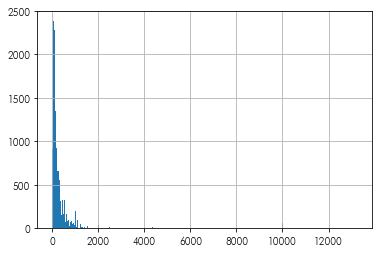

In [18]:
listings.price.hist(bins=300)

In [19]:
listings.iloc[listings.price.idxmax()]

id                                                                                       33614278
listing_url                                                 https://www.airbnb.com/rooms/33614278
scrape_id                                                                          20190514155147
last_scraped                                                                           2019-05-14
name                                                           THE ARRIVE SAPPHIRE ON LAKE AUSTIN
summary                                         Welcome to The ARRIVE Sapphire on Lake Austin ...
space                                                                                         NaN
description                                     Welcome to The ARRIVE Sapphire on Lake Austin ...
experiences_offered                                                                          none
neighborhood_overview                                                                         NaN
notes               

In [21]:
IFrame(src=listings.iloc[listings.price.idxmax()].listing_url, width=800, height=800)

In [22]:
listings = listings[listings.price < listings.price.quantile(.99)]

In [139]:
listings['price_per_head'] = listings.price / listings.accommodates

# Basemaps

In [23]:
listings = listings.to_crs(epsg=3857)
neighborhoods = neighborhoods.to_crs(epsg=3857)

In [24]:
import contextily
basemap, basemap_extent = contextily.bounds2img(*neighborhoods.total_bounds, zoom=10)

In [25]:
from matplotlib_scalebar.scalebar import ScaleBar

array([-10917264.20931646, -10858277.45829849,   3512350.07574952,
         3570742.87985925])

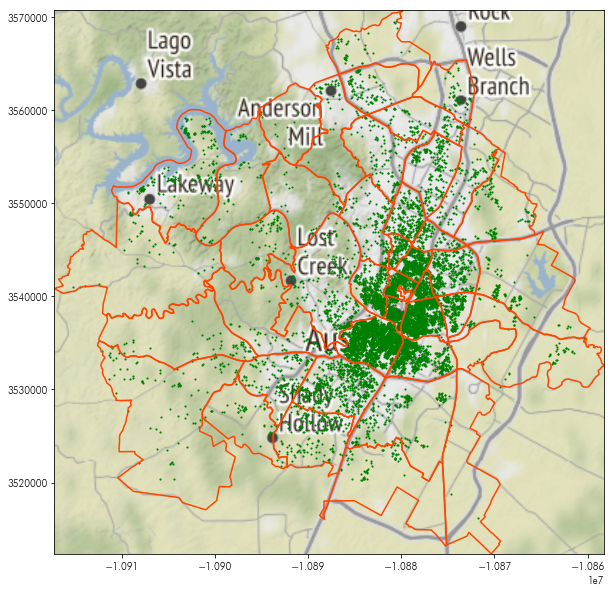

In [26]:
plt.figure(figsize=(10, 10))
plt.imshow(basemap, extent=basemap_extent, interpolation='bilinear')
neighborhoods.boundary.plot(ax=plt.gca(), color='orangered')
listings.plot(ax=plt.gca(), marker='.', markersize=5, color='green')
plt.axis(neighborhoods.total_bounds[[0,2,1,3]])

In [27]:
tonermap, tonermap_extent = contextily.bounds2img(*neighborhoods.total_bounds, zoom=10, 
                                                url=contextily.tile_providers.ST_TONER_LITE)

array([-10917264.20931646, -10858277.45829849,   3512350.07574952,
         3570742.87985925])

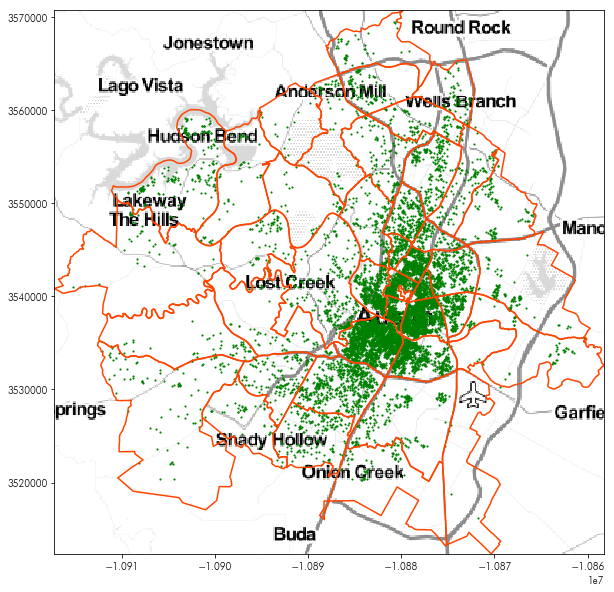

In [28]:
plt.figure(figsize=(10,10))
plt.imshow(tonermap, extent=tonermap_extent)
neighborhoods.boundary.plot(ax=plt.gca(), color='orangered')
listings.plot(ax=plt.gca(), marker='.', markersize=5, color='green')
plt.axis(neighborhoods.total_bounds[[0,2,1,3]])

In [29]:
transit = 'http://tile.memomaps.de/tilegen/tileZ/tileX/tileY.png'

In [30]:
transitmap, transitmap_extent = contextily.bounds2img(*neighborhoods.total_bounds, zoom=10, 
                                                      url=transit)

array([-10917264.20931646, -10858277.45829849,   3512350.07574952,
         3570742.87985925])

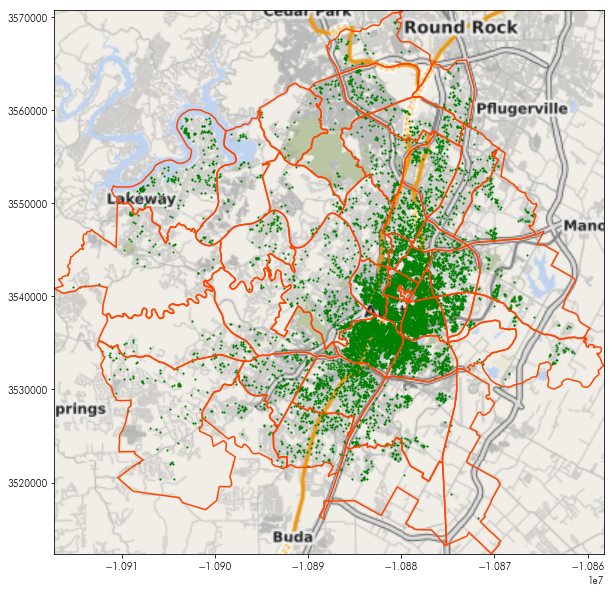

In [31]:
plt.figure(figsize=(10,10))
plt.imshow(transitmap, extent=transitmap_extent, interpolation='bilinear')
neighborhoods.boundary.plot(ax=plt.gca(), color='orangered')
listings.plot(ax=plt.gca(), marker='.', markersize=5, color='green')
plt.axis(neighborhoods.total_bounds[[0,2,1,3]])

### other cartographic resources

- geoplot
- matplotlib_scalebar
- cartopy
- splot

# Spatial Data Processing

People often disagree about the naming and boundaries of their neighborhoods. From a practical perspective, our data on Airbnbs has a few different pieces of information about neighborhoods. In the `listings` dataframe, each individual Airbnb offers up some information about what "neighborhood" it falls within:

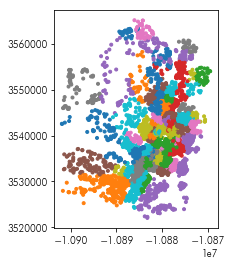

In [32]:
listings.dropna(subset=['hood']).plot('hood', marker='.')

In [33]:
(listings.groupby('hood') #group by the neighborhood
         .id.count() # get the count of observations
         .sort_values(ascending=False) # sort the counts to have the most populous first
         .head(20)) # and get the top 20

hood
East Downtown          1121
Downtown                629
Travis Heights          480
University of Texas     411
Zilker                  383
Bouldin Creek           355
East Riverside          342
Barton Hills            308
South Lamar             307
Cherry Creek            284
MLK & 183               264
Upper Boggy Creek       236
McKinney                222
Old West Austin         203
North Loop              197
South Congress          178
Govalle                 174
Hancock                 168
Mueller                 159
Hyde Park               158
Name: id, dtype: int64

In [34]:
chulls = listings.groupby('hood')\
                 .geometry.apply(lambda x: x.unary_union.convex_hull.boundary)\
                 .reset_index()
chulls = geopandas.GeoDataFrame(chulls)

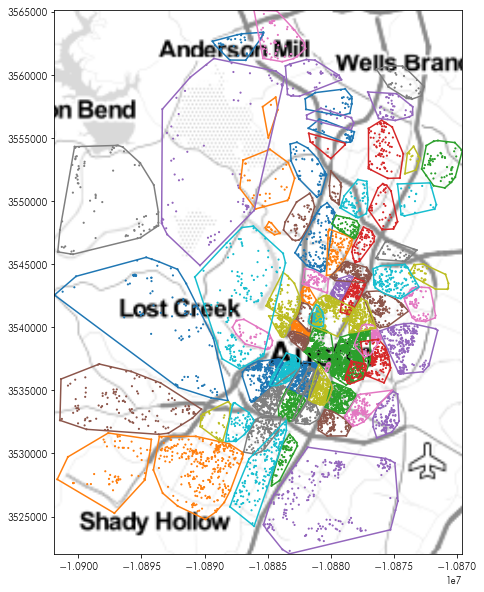

In [35]:
plt.figure(figsize=(10,10))
plt.imshow(tonermap, extent=tonermap_extent, interpolation='bilinear')
chulls.plot('hood', ax=plt.gca())
listings.dropna(subset=['hood']).plot('hood', ax=plt.gca(), 
                                      marker='.', markersize=5)
plt.axis(chulls.total_bounds[[0,2,1,3]])
plt.show()

Some weird overlaps there!

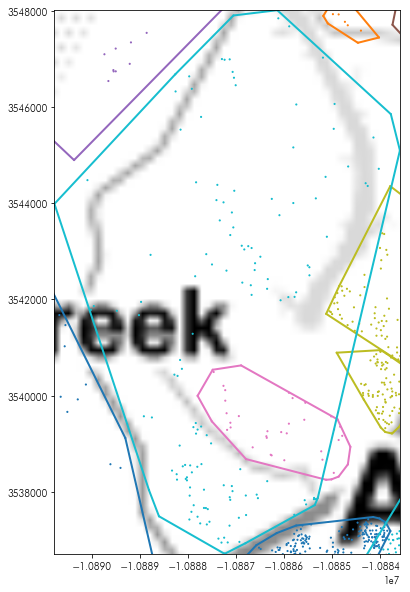

In [36]:
plt.figure(figsize=(10,10))
plt.imshow(tonermap, extent=tonermap_extent, interpolation='bilinear')
chulls.plot('hood', ax=plt.gca(), linewidth=2)
listings.dropna(subset=['hood']).plot('hood', ax=plt.gca(), 
                                      marker='.', markersize=5)
plt.axis(chulls.query('hood == "Westlake Hills"').total_bounds[[0,2,1,3]])
plt.show()

In [37]:
from pysal.lib.cg import alpha_shape_auto
from pysal.lib.weights.distance import get_points_array

In [38]:
ashapes = listings.groupby('hood')\
                  .geometry.apply(lambda x: 
                                  alpha_shape_auto(get_points_array(x.unary_union)).boundary)\
                  .reset_index()
ashapes = geopandas.GeoDataFrame(ashapes)

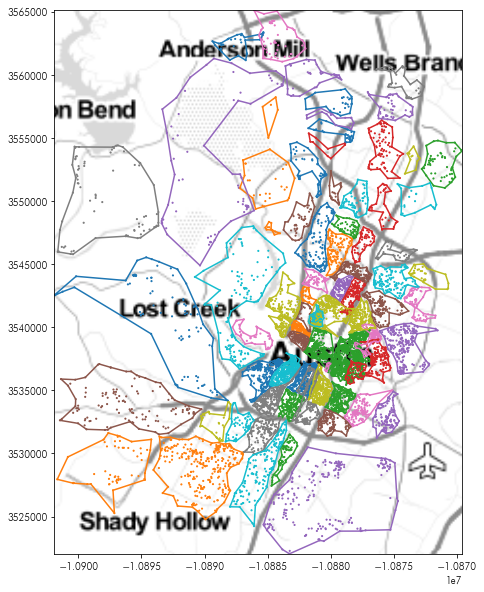

In [39]:
plt.figure(figsize=(10,10))
plt.imshow(tonermap, extent=tonermap_extent, interpolation='bilinear')
ashapes.plot('hood', ax=plt.gca())
listings.dropna(subset=['hood']).plot('hood', ax=plt.gca(), 
                                      marker='.', markersize=5)
plt.axis(ashapes.total_bounds[[0,2,1,3]])
plt.show()

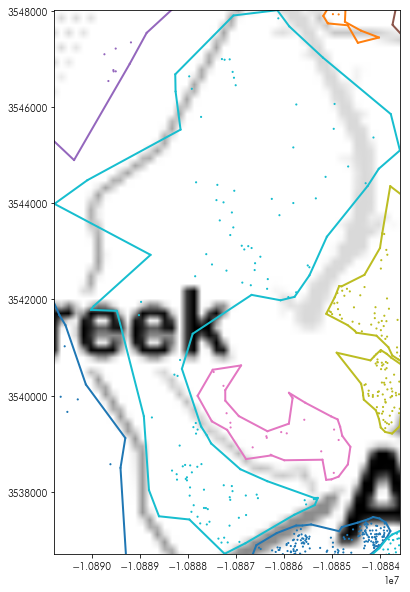

In [40]:
plt.figure(figsize=(10,10))
plt.imshow(tonermap, extent=tonermap_extent, interpolation='bilinear')
ashapes.plot('hood', ax=plt.gca(), linewidth=2)
listings.dropna(subset=['hood']).plot('hood', ax=plt.gca(), 
                                      marker='.', markersize=5)
plt.axis(ashapes.query('hood == "Westlake Hills"').total_bounds[[0,2,1,3]])
plt.show()

### Whose name is it, anyway?

*explain/write a bit more about the theory/concepts behind classic spatial joins, discuss how they're usually used across different kinds of spatial supports*

In [221]:
listings_in_hoods = geopandas.sjoin(listings, neighborhoods)

In [222]:
listings_in_hoods.groupby(('hood', 'hood_id')).id.count()

/home/lw17329/anaconda3/envs/ana/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


hood                        hood_id
Allendale                   78731       37
                            78756       43
                            78757       51
Anderson Mill               78729        5
                            78750       27
Angus Valley                78727       27
                            78759        3
Balcones Civic Association  78731        1
                            78759       50
Balcony Woods               78758       26
                            78759       10
Barton Creek                78733       24
                            78735       30
                            78738        5
                            78746       33
Barton Hills                78704      228
                            78746       80
Bouldin Creek               78704      355
Brentwood                   78756       68
                            78757       60
Bryker Woods                78703       34
                            78705        1
Bull Creek        

In [223]:
listings_in_hoods.groupby(('hood', 'hood_id'))\
         .id.count().unstack().fillna('-')

/home/lw17329/anaconda3/envs/ana/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


hood_id                    78701 78702 78703 78704 78705 78712 78717 78719  \
hood                                                                         
Allendale                      -     -     -     -     -     -     -     -   
Anderson Mill                  -     -     -     -     -     -     -     -   
Angus Valley                   -     -     -     -     -     -     -     -   
Balcones Civic Association     -     -     -     -     -     -     -     -   
Balcony Woods                  -     -     -     -     -     -     -     -   
Barton Creek                   -     -     -     -     -     -     -     -   
Barton Hills                   -     -     -   228     -     -     -     -   
Bouldin Creek                  -     -     -   355     -     -     -     -   
Brentwood                      -     -     -     -     -     -     -     -   
Bryker Woods                   -     -    34     -     1     -     -     -   
Bull Creek                     -     -     -     -     -     -     -     -   
Canyon Mesa                    -     -     -     -     -     -     -     -   
Cat Mountian                   -     -     -     -     -     -     -     -   
Cherry Creek                   -     -     -     -     -     -     -     -   
Circle C                       -     -     -     -     -     -     -     -   
Clarksville                    -     -   128     -     -     -     -     -   
Copperfield                    -     -     -     -     -     -     -     -   
Crestview                      -     -     -     -     -     -     -     -   
Dawson                         -     -     -   104     -     -     -     -   
Downtown                     595     -    34     -     -     -     -     -   
East Congress                  -     -     -     -     -     -     -     -   
East Downtown                  -  1121     -     -     -     -     -     -   
East Riverside                 -     -     -     1     -     -     -     -   
Galindo                        -     -     -   122     -     -     -     -   
Gateway                        -     -     -     -     -     -     -     -   
Georgian Acres                 -     -     -     -     -     -     -     -   
Govalle                        -   174     -     -     -     -     -     -   
Gracywoods                     -     -     -     -     -     -     -     -   
Hancock                        -     -     -     -    27     -     -     -   
Highland                       -     -     -     -     -     -     -     -   
...                          ...   ...   ...   ...   ...   ...   ...   ...   
Pleasant Valley                -     -     -     -     -     -     -     -   
Rainey Street                 28     -     -     -     -     -     -     -   
Rollingwood                    -     -     -     -     -     -     -     -   
Rosedale                       -     -     -     -     -     -     -     -   
Rosewood                       -   138     -     -     -     -     -     -   
SW Williamson Co.              -     -     -     -     -     -     4     -   
Scofield Ridge                 -     -     -     -     -     -     -     -   
South Congress                 -     -     -   178     -     -     -     -   
South First                    -     -     -    57     -     -     -     -   
South Lamar                    -     -     -   307     -     -     -     -   
South Manchaca                 -     -     -     1     -     -     -     -   
St. Edwards                    -     -     -    95     -     -     -     -   
St. Johns                      -     -     -     -     -     -     -     -   
Steiner Ranch                  -     -     -     -     -     -     -     -   
Sunset Valley                  -     -     -     -     -     -     -     -   
Tarrytown                      -     -   125     -     -     -     -     -   
Travis Heights                 -     -     -   480     -     -     -     -   
University Hills               -     -     -     -     -     -     -     -   
University of Texas   

In [242]:
saidhoods_in_hood = listings_in_hoods.groupby('hood_id').hood.unique().apply(len).to_frame('number_names')

In [243]:
saidhoods_in_hood = neighborhoods.merge(saidhoods_in_hood, how='left', 
                                        left_on='hood_id', right_index=True)

array([-10917264.20931646, -10858277.45829849,   3512350.07574952,
         3570742.87985925])

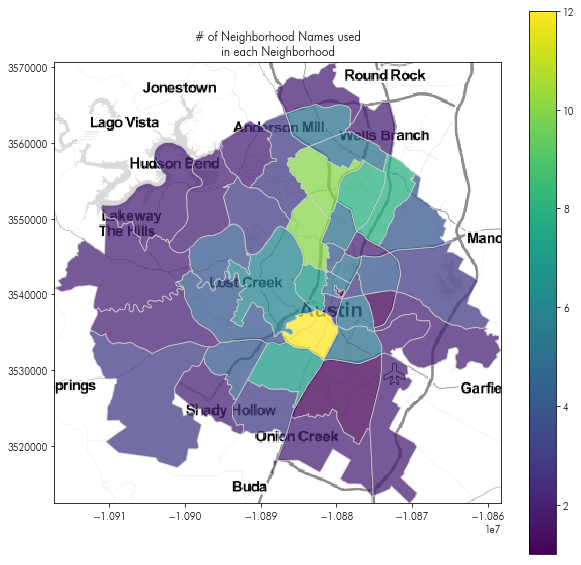

In [255]:
plt.figure(figsize=(10,10))
plt.imshow(tonermap, extent=tonermap_extent)
saidhoods_in_hood.plot('number_names', ax = plt.gca(), 
                       alpha=.75, edgecolor='lightgrey', legend=True)
plt.title('# of Neighborhood Names used\nin each Neighborhood')
plt.axis(saidhoods_in_hood.total_bounds[[0,2,1,3]])

### What do nearby airbnbs look like?

*talk a little bit about "nearest"/"nearby" spatial joins/aggregations, and how they differ conceptually from standard spatial joins used in geopandas.sjoin*

In [261]:
downtown_hoods = ('Downtown', 'East Downtown')
downtown_listings = listings.query('hood in @downtown_hoods')

In [429]:
downtown_basemap, downtown_basemap_extent = contextily.bounds2img(*downtown_listings.buffer(1500).total_bounds, zoom=14)

In [262]:
searchbuffer = downtown_listings.buffer(1000)

searchbuffer = geopandas.GeoDataFrame(downtown_listings.price_per_head.values,
                                      geometry=searchbuffer.tolist(), 
                                      columns=['buffer_pph'])
searchbuffer.crs = downtown_listings.crs

In [263]:
downtown_areasummaries = buffered.groupby('id').buffer_pph.describe()

In [264]:
downtown_areasummaries.head()

count       mean        std        min        25%        50%  \
id                                                                    
2265   223.0  57.530783  46.274441   6.500000  29.000000  40.625000   
5245   230.0  57.054411  45.892181   6.500000  28.812500  41.250000   
5456   418.0  72.607706  69.896100   7.666667  33.333333  50.000000   
6413    49.0  70.804113  42.765797  17.666667  39.800000  66.666667   
14765   22.0  83.328030  83.372442  31.000000  41.875000  70.833333   

              75%         max  
id                             
2265    69.625000  300.000000  
5245    69.125000  300.000000  
5456    76.916667  500.000000  
6413   100.000000  242.222222  
14765   84.508333  437.500000

In [265]:
downtown_areasummaries.columns = ['count', 'mean', 'std', 'min', 
                                  'lower_quartile', 'median', 'upper_quartile', 'max']

In [266]:
downtown_areasummaries = downtown_listings.merge(left_on='id', 
                                                 right=downtown_areasummaries,
                                                 right_index=True, how='left')

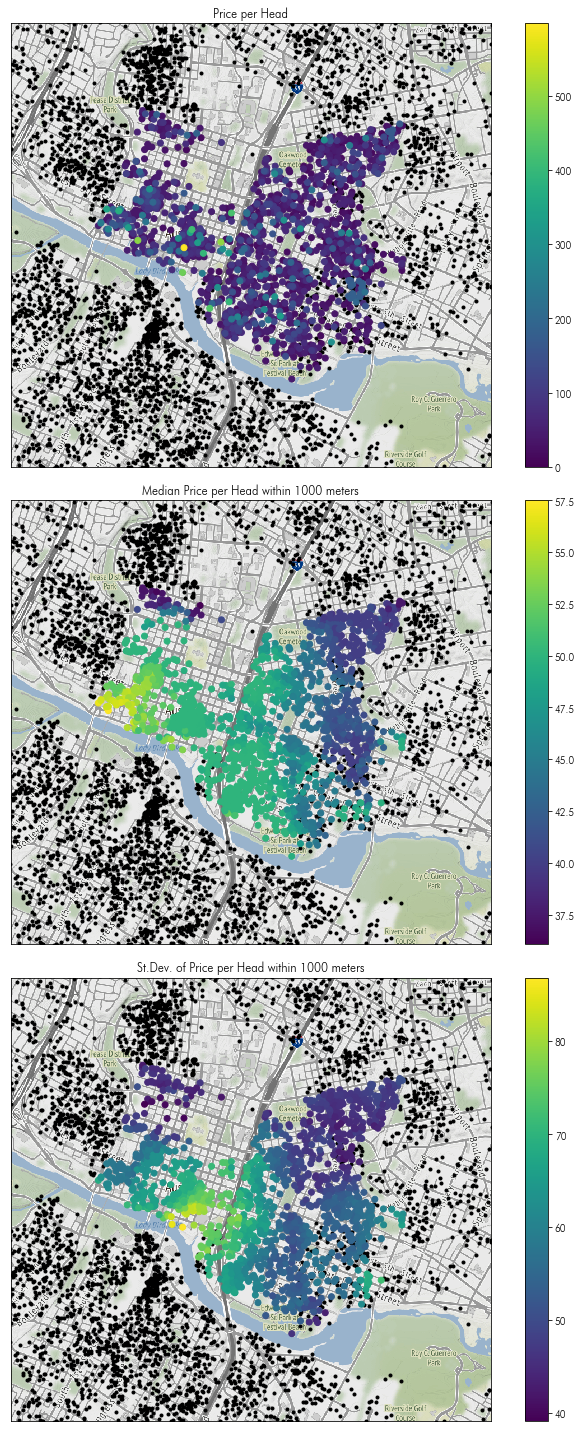

In [451]:
f, ax = plt.subplots(3,1,figsize=(10,20), sharex=True, sharey=True)
for ax_ in ax:
    listings.plot(color='k', marker='.', ax=ax_)
    ax_.set_xticks([])
    ax_.set_xticklabels([])
    ax_.set_yticks([])
    ax_.set_yticklabels([])
    ax_.imshow(downtown_basemap, extent=downtown_basemap_extent)
    
downtown_listings.sort_values('price_per_head', ascending=True)\
                 .plot('price_per_head', 
                       ax=ax[0], legend=True)

downtown_areasummaries.sort_values('price_per_head', ascending=True)\
        .plot('median', ax=ax[1], legend=True)
downtown_areasummaries.sort_values('price_per_head', ascending=True)\
        .plot('std', ax=ax[2], legend=True)


ax[1].axis(listings.query('hood in @downtowns').total_bounds[[0,2,1,3]])
ax[0].set_title('Price per Head')
ax[1].set_title('Median Price per Head within 1000 meters')
ax[2].set_title('St.Dev. of Price per Head within 1000 meters')
ax[0].axis(downtown_listings.buffer(1500).total_bounds[[0,2,1,3]])

f.tight_layout()

### In the whole map?

In [288]:
from pysal.lib.weights.distance import get_points_array
import numpy

In [286]:
coordinates = get_points_array(listings.geometry)
prices = listings.price_per_head.values

In [270]:
from scipy.spatial import cKDTree

In [274]:
kdt = cKDTree(coordinates)

In [283]:
neighbors = kdt.query_ball_tree(kdt, 1000)

In [293]:
numpy.asarray(neighbors[0])

array([    0,    79,    80,    83,    84,    87,   112,   293,   381,
         473,   514,   527,   528,   546,   563,   614,   621,   629,
         649,   666,   710,   718,   726,   751,   779,   798,   878,
        1100,  1103,  1123,  1134,  1234,  1386,  1408,  1536,  1589,
        1748,  1933,  1953,  1992,  2021,  2026,  2047,  2072,  2144,
        2151,  2253,  2296,  2334,  2358,  2376,  2441,  2524,  2570,
        2662,  2732,  2746,  2916,  2956,  2974,  3027,  3264,  3296,
        3302,  3340,  3386,  3389,  3395,  3407,  3420,  3474,  3561,
        3586,  3629,  3674,  3744,  3796,  3804,  3872,  3929,  3957,
        3961,  3990,  4091,  4094,  4172,  4182,  4214,  4276,  4335,
        4412,  4536,  4673,  4688,  4726,  4828,  4834,  4859,  5051,
        5161,  5259,  5393,  5436,  5638,  5671,  5712,  5757,  5793,
        5800,  5881,  5903,  6018,  6019,  6228,  6335,  6674,  6735,
        6744,  6869,  6888,  6909,  6932,  6998,  7081,  7146,  7161,
        7222,  7253,

In [298]:
def summarize(ary):
    return numpy.median(ary), numpy.std(ary)
summary = numpy.asarray([summarize(prices[neighbs]) for neighbs in neighbors]) 

In [304]:
listings = listings.assign(**dict(zip(['median_pph_1km', 'std_pph_1km'], summary.T)))

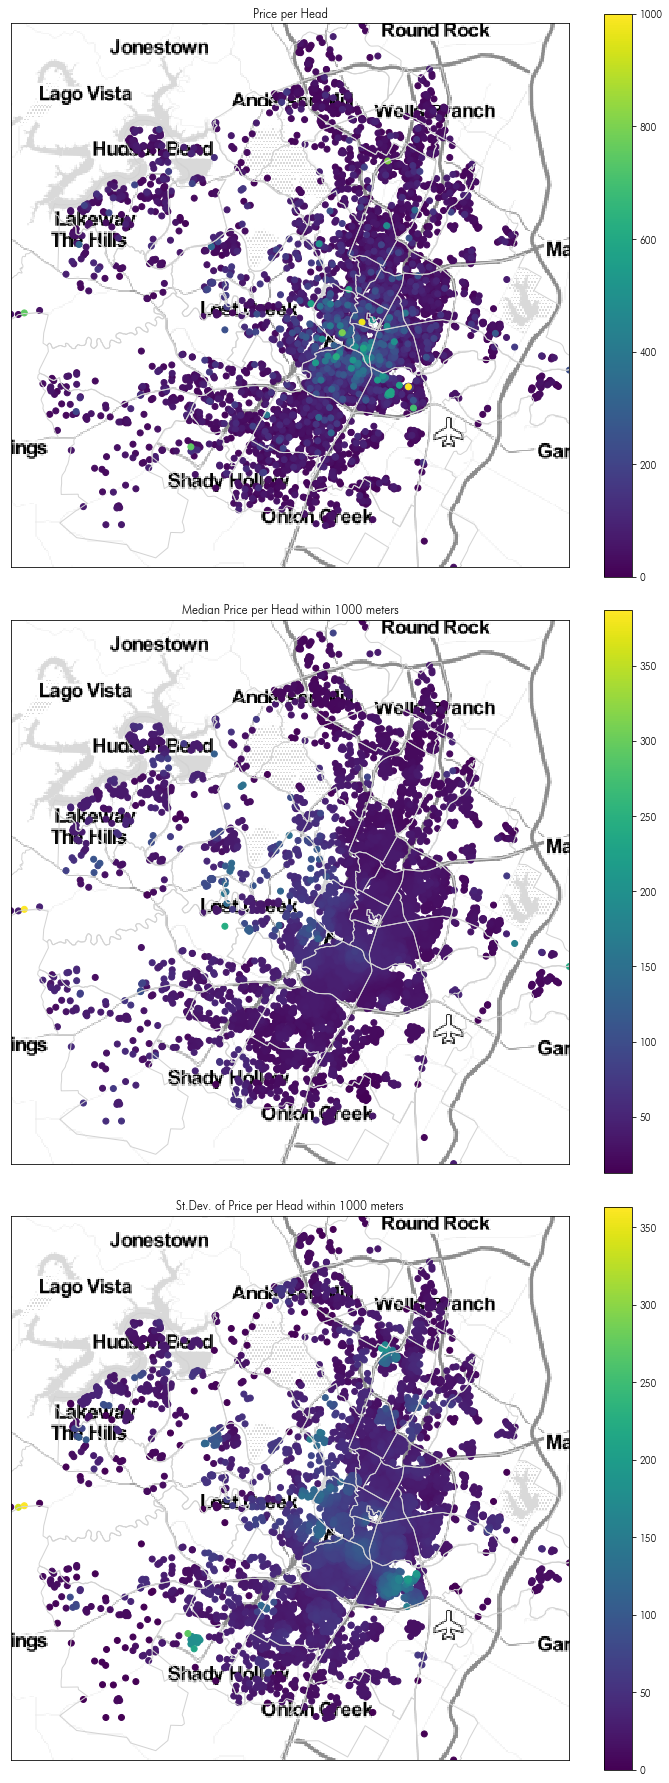

In [452]:
f, ax = plt.subplots(3,1,figsize=(10,25), sharex=True, sharey=True)
    
listings.sort_values('price_per_head', ascending=True)\
                 .plot('price_per_head', 
                       ax=ax[0], legend=True)

listings.sort_values('median_pph_1km', ascending=True)\
        .plot('median_pph_1km', ax=ax[1], legend=True)
listings.sort_values('std_pph_1km', ascending=True)\
        .plot('std_pph_1km', ax=ax[2], legend=True)


ax[0].set_title('Price per Head')
ax[1].set_title('Median Price per Head within 1000 meters')
ax[2].set_title('St.Dev. of Price per Head within 1000 meters')

for ax_ in ax:
    ax_.set_xticks([])
    ax_.set_xticklabels([])
    ax_.set_yticks([])
    ax_.set_yticklabels([])
    ax_.imshow(tonermap, extent=tonermap_extent)
    ax_.axis(listings.total_bounds[[0,2,1,3]])
    neighborhoods.plot(ax=ax_, edgecolor='lightgrey', facecolor='none')

f.tight_layout()

### How about nearest neighbor joins?

In [320]:
is_shared = ~ (listings.room_type=="Entire home/apt")

(0, 250)

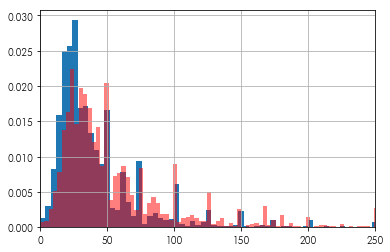

In [347]:
listings[is_shared].price_per_head.hist(bins=250, density=True)
listings[~is_shared].price_per_head.hist(bins=250, density=True, color='r', alpha=.5)
plt.xlim(0,250)

In [367]:
shared_kdt = cKDTree(coordinates[is_shared])
alone_kdt = cKDTree(coordinates[~ is_shared])

In [368]:
nearest_unshared_dist, nearest_unshared_ix = shared_kdt.query(coordinates[~is_shared])
nearest_alone_dist, nearest_alone_ix = alone_kdt.query(coordinates[is_shared])

In [390]:
listings.loc[~is_shared, 'nearest_othertype'] = listings.index[nearest_unshared_ix]
listings.loc[is_shared, 'nearest_othertype'] = listings.index[nearest_alone_ix]

In [392]:
listings.loc[~is_shared, 'nearest_othertype_dist'] = nearest_unshared_dist
listings.loc[is_shared, 'nearest_othertype_dist'] = nearest_alone_dist

Text(0.5, 1.0, 'Distance to nearest other type of accommodation (m)')

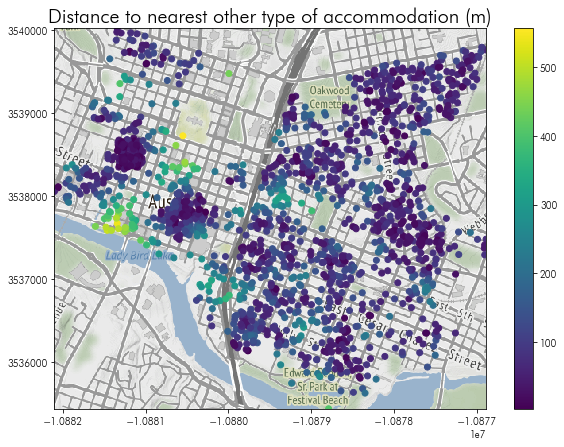

In [453]:
f = plt.figure(figsize=(10,7))
plt.imshow(downtown_basemap, extent=downtown_basemap_extent)
listings.query('hood in @downtowns').plot('nearest_othertype_dist', ax=plt.gca(), legend=True)
plt.axis(downtown_listings.total_bounds[[0,2,1,3]])
plt.title('Distance to nearest other type of accommodation (m)', fontsize=20)